## Linear Regression

## **Regression Models**
Regression models use **features** to understand the **relationship** among **continuous features** and the **output variable**.  
They learn patterns to **determine the value** of **new data points**.

### **Objective:**
- Predicts a **continuous numerical value** based on input features.

### **Output:**
- Continuous values (**real numbers**).

### **Example Problem:**
- Predicting **house prices** based on **size, location, and other features**.

---

## **Case Scenario: CAR DEKHO**

### **About CarDekho**
- **Founded in 2008** by **Amit Jain and Anurag Jain**.
- **India's leading automotive platform** for **buying and selling new and used cars**.
- Offers **car reviews, comparisons, prices, expert advice, and innovative tools** like **360-degree views**.
- **Partners with dealers, financial institutions, and insurance providers** to enhance the **car ownership experience**.
- **Expanded operations** to **Southeast Asia and the UAE**.
- **Valued at over $1 billion**.

---

## **Problem Statement**
- The **used car market** in India is **dynamic** and ever-changing.
- **Car prices fluctuate** based on:
  - **Make and model**
  - **Mileage**
  - **Condition**
  - **Market conditions**
- Sellers **struggle to price their cars accurately**, affecting sales.

---

## **Approach**
- **Develop a machine learning model** to **predict the price** of a **used car** based on its **features**.
- Train the model on a **dataset** of **used cars sold on CarDekho.com** in India.
- The model will be able to **predict the price** of any used car **given its features**.

---

## **Objective**
- **Predict Car Prices** using a **Machine Learning Model**.

---

## **Benefits**
- **Sellers** can **price their cars more accurately**, helping them **sell faster** and for a **higher price**.
- **Buyers** can find **competitively priced cars** more easily.
- The **used car market in India** will become **more efficient**.


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 

In [5]:
#Load the dataset 
data = "D:\\Wscude projects\\week 17\\Cardekho.csv" 
df =pd.read_csv(data)

# Check the first few rows of the dataset
df.head()


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [7]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [9]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [11]:
# Check the shape of the data (rows and columns)
df.shape


(15411, 14)

In [13]:
# Data cleaning: Drop unwanted columns
df.drop(columns=['Unnamed: 0'], inplace=True)

#Checking null values
df.isnull().sum()


car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [15]:
# Checking Duplicate values
df.duplicated().sum()


167

In [17]:
# Statistical summary of numerical columns
df.describe()


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


# Exploratory Data Analysis (EDA)

## Univariate Analysis (Examining Individual Variables)

### Univariate analysis involves looking at the distribution of individual features. This helps in understanding if any outliers are present and the overall distribution of the data.


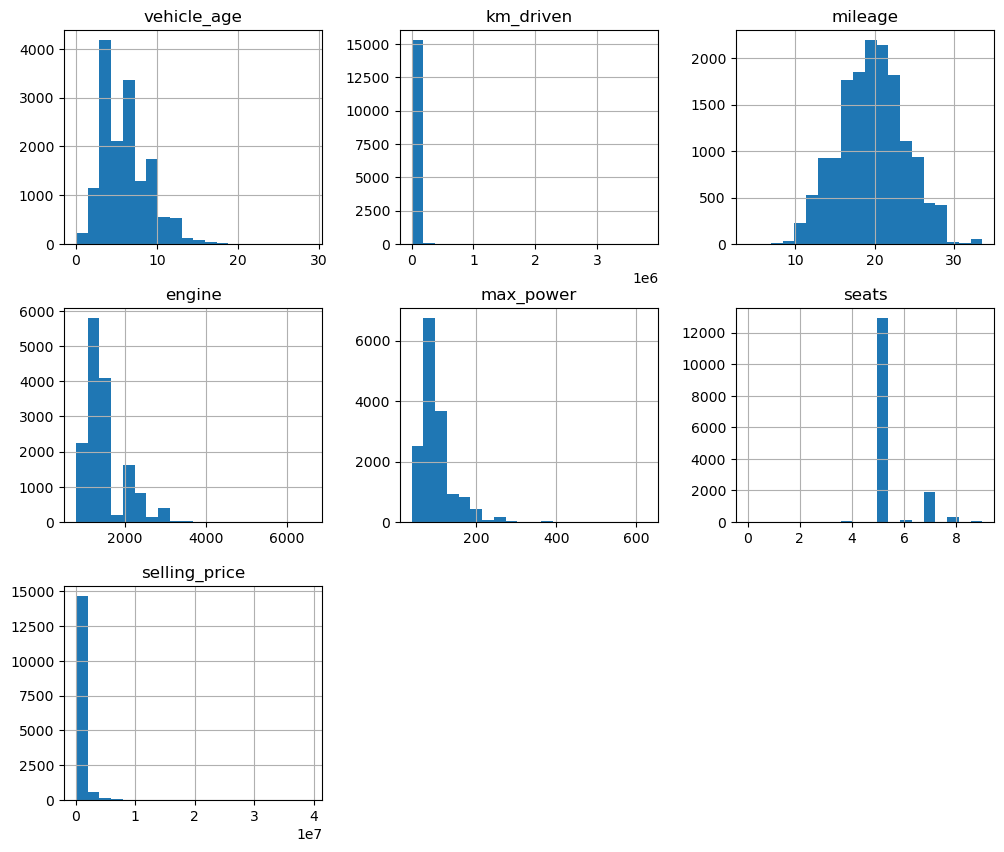

In [21]:
# Plot histograms for numerical features 
df.hist(figsize=(12, 10), bins=20) 
plt.show()


In [23]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

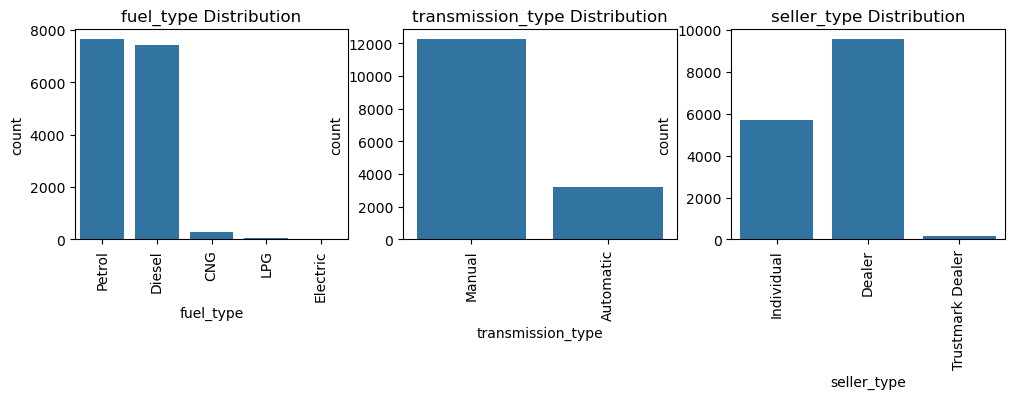

In [25]:
# Categorical features
categorical_features = ["fuel_type", "transmission_type", "seller_type"]
plt.figure(figsize=(12, 6))

# Loop through each categorical feature and plot the count plot
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=feature, data=df)
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=90)

plt.show()


## **Bivariate Analysis (Examining the Relationship Between Two Variables)**

We examine the relationship between the **target variable (`selling_price`)** and other features.  
This step helps in understanding **which features have strong correlations** with the target variable.


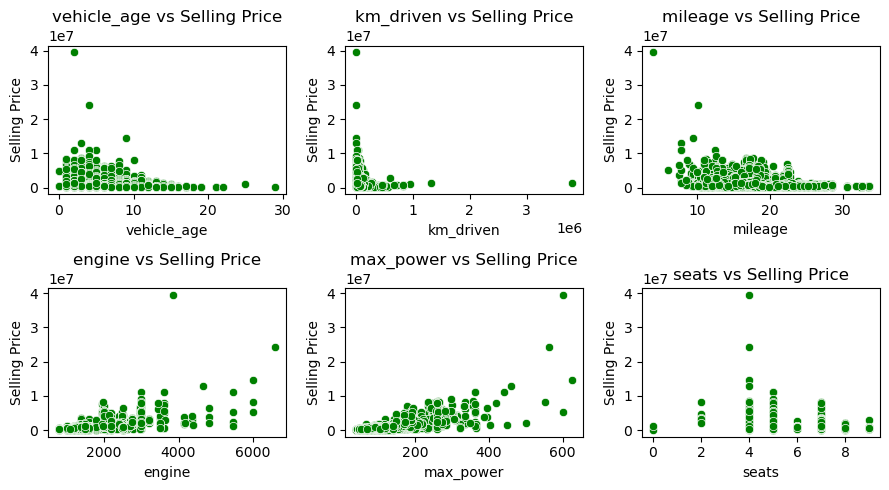

In [30]:
# Numerical features
numerical_features = ['vehicle_age', 'km_driven', 'mileage', 'engine',
                      'max_power', 'seats']

# Create subplots for scatter plots
plt.figure(figsize=(9, 5))

# Scatter plot for each numerical feature vs selling price
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['selling_price'], color='green')
    plt.title(f'{feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()


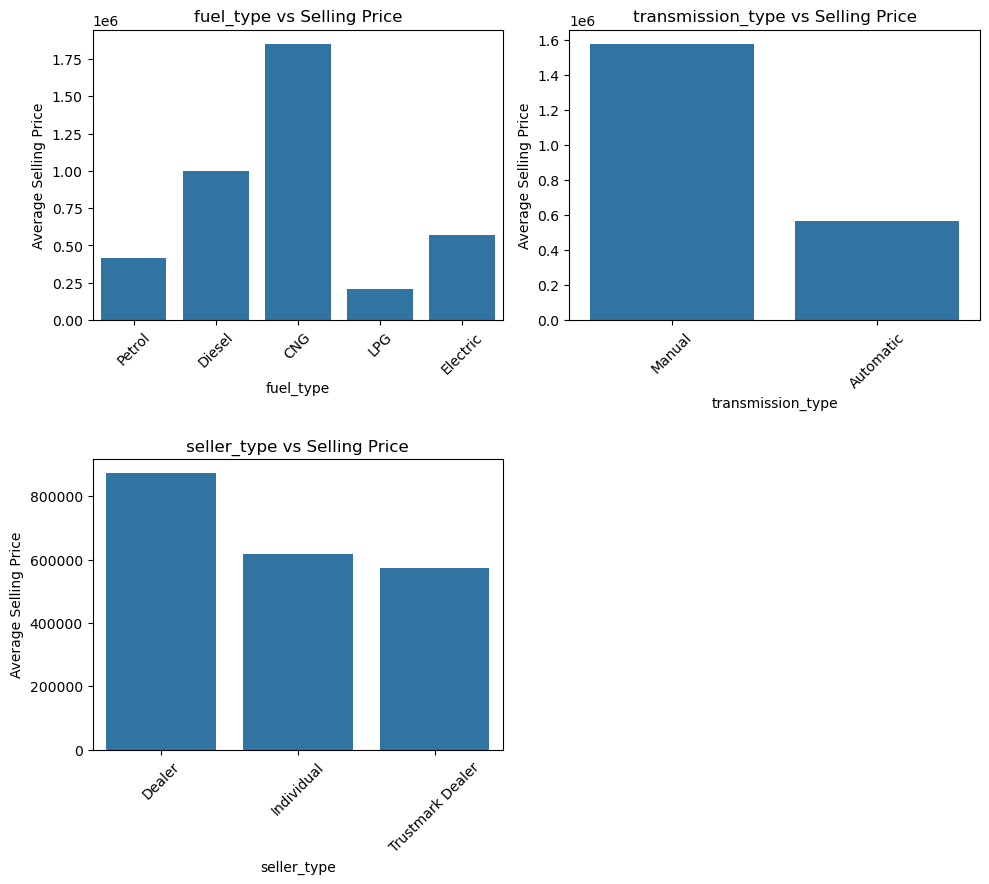

In [32]:
# Categorical features to analyze
categorical_features = ['fuel_type', 'transmission_type', 'seller_type']

# Set figure size for the plots
plt.figure(figsize=(10, 12))

# Create subplots for bar plots of categorical features vs selling price
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.barplot(x=df[feature].value_counts().index, 
                y=df.groupby(feature)['selling_price'].mean().values)
    plt.title(f'{feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Average Selling Price')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Multivariate Analysis (Correlation between multiple variables)


In [35]:
# List of numerical features to calculate correlation for
numerical_features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

# Calculate the correlation matrix for selected numerical features
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)


               vehicle_age  km_driven   mileage    engine  max_power  \
vehicle_age       1.000000   0.333891 -0.257394  0.098965   0.005208   
km_driven         0.333891   1.000000 -0.105239  0.192885   0.044421   
mileage          -0.257394  -0.105239  1.000000 -0.632987  -0.533128   
engine            0.098965   0.192885 -0.632987  1.000000   0.807368   
max_power         0.005208   0.044421 -0.533128  0.807368   1.000000   
seats             0.030791   0.192830 -0.440280  0.551236   0.172257   
selling_price    -0.241851  -0.080030 -0.305549  0.585844   0.750236   

                  seats  selling_price  
vehicle_age    0.030791      -0.241851  
km_driven      0.192830      -0.080030  
mileage       -0.440280      -0.305549  
engine         0.551236       0.585844  
max_power      0.172257       0.750236  
seats          1.000000       0.115033  
selling_price  0.115033       1.000000  


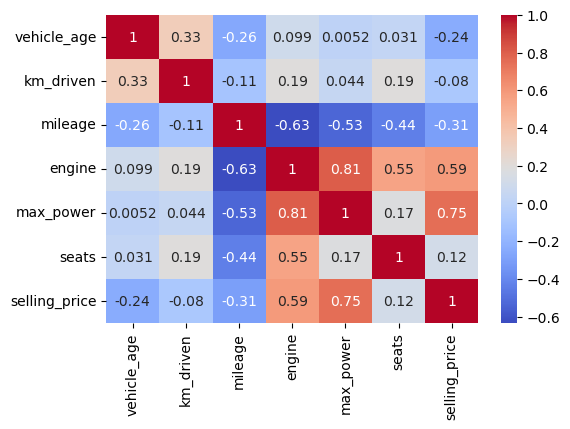

In [37]:
#Plot the heatmap for checking the correlation
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.show()


## **Summary of Correlation Insights**

### **Vehicle Age vs. Selling Price:**
- **Negative correlation (-0.24)** → Older cars usually have **lower prices**.

### **Kilometers Driven vs. Selling Price:**
- **Weak negative correlation (-0.08)** → **Minor effect** on selling price.

### **Mileage vs. Selling Price:**
- **Moderate negative correlation (-0.31)** → **Low-mileage cars** tend to have **higher prices**.

### **Engine Capacity vs. Selling Price:**
- **Moderate positive correlation (0.59)** → **Larger engines** often lead to **higher prices**.

### **Max Power vs. Selling Price:**
- **Strong positive correlation (0.75)** → Higher **max power** correlates with **higher prices**.

### **Seats vs. Selling Price:**
- **Weak positive correlation (0.12)** → **Minor effect** on price.

---

## **Other Key Insights:**
- **Mileage & Engine Capacity** → **Strong negative correlation (-0.63)**.
- **Mileage & Max Power** → **Moderate negative correlation (-0.53)**.

---

## **Conclusion:**
- **Max Power** is the **strongest predict
- **Vehicle Age, Mileage, and Kilometers Driven** show expected **negative correlations** with **Selling Price**.

---

## **Data Preprocessing Steps**
After the **Exploratory Data Analysis (EDA)**, we need to:
1. **Drop irrelevant columns** that won't help in predicting the target variable.
2. **Encode categorical variables** (e.g., `fuel_type`, `transmission_type`) into **numerical representations**.
3. **Split the data** into **training and testing sets** for model training.


In [41]:
model_data = df.copy() 
model_data.head()


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [43]:
# Drop irrelevant columns
model_data.drop(labels = ['car_name','brand','model','seller_type'],axis = 1, inplace = True)
model_data = pd.get_dummies(model_data,dtype = float) 
model_data


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## **Understanding Features (X) and Target (y)**

In any **supervised learning** task, the dataset consists of **two main components**:

### **1. Features (X)**
These are the **input variables** used to predict the target.  
For example, in **predicting house prices**, features include:
- **Number of bedrooms**
- **Square footage of the living area**
- **Lot size**
- **Age of the house**
- **Location** (e.g., postal code, latitude, longitude)

### **2. Target (y)**
This is the **output variable** we want to predict.  
For example, in this case, the **target is the price of the house**.

---

## **Why Split the Dataset?**
In **supervised learning**, we use **features (X)** to make predictions about the **target (y)**.  
The features contain the **information** that helps the **machine learning model** learn the **relationship** with the target.

We separate these components so that the model can **learn the mapping from X (inputs) to y (output)**.

### **Key Reasons for Splitting:**
- **X (Features)**: These are the **predictors** (independent variables) that help the model **learn patterns or relationships** influencing the target variable.
- **y (Target)**: This is the **variable we want to predict**. The machine learning model will try to **map the inputs (X) to the correct output (y)** (e.g., house price).


In [46]:
# Define features (X) and target (Y)
X = model_data.drop('selling_price', axis=1)	# Independent variables
Y = model_data['selling_price']	# Target variable


## **Splitting the Data into Training and Test Sets**

It’s important to **separate the data** into **training and testing sets** to **evaluate the performance** of the model.  

- The **training set** is used to **train** the machine learning model.  
- The **test set** is used to **evaluate** how well the model performs on **unseen data**.  

This ensures that the model **generalizes well** to new data and **does not overfit** to the training data.


In [55]:
# Define features (X) and target variable (Y)
X = model_data.drop('selling_price', axis=1)
Y = model_data['selling_price']

# Split data into training (80%) and testing (20%) sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the size of training and testing sets
print(f"Training set size: {train_X.shape}, Testing set size: {test_X.shape}")


Training set size: (12328, 13), Testing set size: (3083, 13)


# Train the Regression Model


In [58]:
# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model on the training data
regressor.fit(train_X, train_Y)

# Predict on the test data
predictions = regressor.predict(test_X)

# Show the first few predicted values
print(predictions[:5])


[  12533.80088833  563966.41898296  472216.76074198 1486613.93486826
 -458171.06051797]


In [62]:
print(test_Y)

3334      190000
10928     600000
2518      665000
11322    1570000
9394      160000
          ...   
1943      295000
10471     840000
13098     790000
6545      440000
14377     861000
Name: selling_price, Length: 3083, dtype: int64


In [64]:
# Add predicted values to the test dataset
test_X['predicted_sales_price'] = predictions

# Add actual values to compare
test_X['Actual_price'] = test_Y

# Calculate the difference between predicted and actual prices
test_X['difference'] = test_X['predicted_sales_price'] - test_X['Actual_price']

# Display the updated test set
test_X


,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,predicted_sales_price,Actual_price,difference
3334,12,73000,20.36,1197,78.90,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.253380e+04,190000,-177466.199112
10928,4,58000,27.39,1248,74.00,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.639664e+05,600000,-36033.581017
2518,7,96000,20.77,1248,88.76,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.722168e+05,665000,-192783.239258
11322,1,4500,18.40,1498,119.35,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.486614e+06,1570000,-83386.065132
9394,11,62000,19.70,796,46.30,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-4.581711e+05,160000,-618171.060518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,9,38000,22.07,1199,73.90,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.871456e+05,295000,-107854.420902
10471,2,8000,18.10,1199,88.70,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9.234015e+05,840000,83401.450964
13098,2,2200,18.10,1199,88.70,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9.301366e+05,790000,140136.630451
6545,3,30000,20.51,998,67.04,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.160661e+05,440000,-23933.859943


# Model Evaluation

## **Mean Squared Error (MSE)**

### **What is MSE?**
MSE measures the **average squared differences** between the **predicted and actual values**.  
It quantifies **how far off** your model's predictions are, penalizing **larger errors** more heavily due to squaring.

### **Why Use MSE?**
- **Penalizes Larger Errors**: Squaring the error ensures that **large deviations** get **penalized more**.
- **Simple and Effective**: A **clear metric** for model evaluation, with **lower values indicating better performance**.

### **Formula:**
\[
MSE = \frac{1}{n} \sum ( y_i - \hat{y}_i )^2
\]
Where:
- \( y_i \) = **True value**
- \( \hat{y}_i \) = **Predicted value**
- \( n \) = **Number of observations**

### **Interpretation:**
- **Low MSE** → Predictions are **close** to actual values.
- **High MSE** → Indicates **poor prediction accuracy**.
- **Unit**: The unit of **MSE is squared**, making it **less interpretable** than RMSE.

---

## **Root Mean Squared Error (RMSE)**

### **What is RMSE?**
RMSE is the **square root of MSE**, expressing the error in the **same units as the target variable**, making it **more interpretable** than MSE.

### **Why Use RMSE?**
- **Intuitive**: Errors are presented in **the same units** as the target variable.
- **Magnitude of Error**: Gives a **clear idea of the typical prediction error**.

### **Formula:**
\[
RMSE = \sqrt{MSE}
\]

### **Interpretation:**
- **Lower RMSE** → **Better** prediction accuracy.
- **Higher RMSE** → Indicates **larger errors**.
- **Unit**: Same as the **target variable**.

### **Why RMSE over MSE?**
While **MSE** tells you the **average squared error**, **RMSE** provides an **error measure** that’s easier to **interpret in context** (e.g., **INR for car prices**).

---

## **R-squared (R²)**

### **What is R-squared?**
R-squared **measures the proportion of variance** in the target variable that’s **explained by the features in the model**.  
It’s a **relative metric** and ranges from **0 to 1** (or **negative** if the model is worse than a baseline).

### **Why Use R-squared?**
- **Explains Variance**: Shows **how well** the independent variables **explain the variability** of the dependent variable.
- **Model Fit**: A **higher R²** indicates a **better fit**.

### **Formula:**
\[
R^2 = 1 - \frac{\sum ( y_i - \hat{y}_i )^2}{\sum ( y_i - \bar{y} )^2}
\]
Where:
- \( y_i \) = **True value**
- \( \hat{y}_i \) = **Predicted value**
- \( \bar{y} \) = **Mean of the actual values**

### **Interpretation:**
- **R² = 1** → **Perfect fit**; all variance is explained by the model.
- **R² = 0** → The model explains **none** of the variance (**equivalent to predicting the mean**).
- **R² < 0** → The model performs **worse** than the mean predictor.

---

## **Why Use All Three Metrics?**
- **MSE** → Focuses on the **absolute size of the error**.
- **RMSE** → Scales this error to the **same unit** as the target variable for **easier interpretation**.
- **R-squared (R²)** → Provides insight into **how well** the model **fits the data** and **explains variance**.


In [67]:
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(test_Y, predictions) 
rmse = np.sqrt(mse)
r2 = r2_score(test_Y,predictions)

print(f"Mean Squared Error (MSE): {mse}") 
print(f"Root Mean Squared Error (RMSE): {rmse}") 
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 252092722879.1994
Root Mean Squared Error (RMSE): 502088.36162492295
R-squared: 0.6651184631905327


## **Model Evaluation Metrics**

### **Mean Squared Error (MSE):** ₹204,566,383,684.88  
MSE measures how far the predictions are from the true values.  
- **Interpretation:**  
  - The MSE is **204,566,383,684.88**, which is **quite large**.  
  - Since MSE is in **squared units** (e.g., squared INR), it is **hard to interpret directly**.  
  - A **larger MSE** indicates **worse model performance**.  
- **Why it matters:**  
  - MSE provides an **overall measure** of error.  
  - Since it **squares errors**, **larger mistakes are emphasized** more.

---

### **Root Mean Squared Error (RMSE):** ₹452,290.15  
RMSE is the **square root of MSE**, making it **more interpretable**.  
- **Interpretation:**  
  - An RMSE of **₹452,290.15** means that, **on average**, the model's predictions are off by **₹452,290.15 per car**.  
  - RMSE is in the **same units as the target variable** (car prices).  
- **Why it matters:**  
  - **Lower RMSE** means the model's predictions are **closer to actual values**.  
  - The **goal is to minimize RMSE** for better prediction accuracy.

---

### **R-squared (R²):** 0.6731 (or **67.31%**)  
R² measures how well the model **explains the variability** in the target variable (**selling price**).  
- **Interpretation:**  
  - An R² of **0.6731** means that **67.31% of the variance** in **car prices** is **explained by the model**.  
  - **32.69% of the variance remains unexplained** by the model.  
- **Why it matters:**  
  - **Higher R² is generally better**, as it means the model explains **more of the variance**.  
  - In some fields, an **R² of 0.67 is acceptable**, especially for a **complex market like used car prices**.

---

### **Summary**
| Metric  | Value | Interpretation |
|---------|--------|----------------|
| **MSE** | ₹204,566,383,684.88 | Large value, hard to interpret directly due to squared units. |
| **RMSE** | ₹452,290.15 | On average, predictions are **₹452,290.15 off** per car. |
| **R²** | **0.6731 (67.31%)** | Model explains **67.31% of car price variane**, leaving **32.69% unexplained**. |

✅ **Goal:** **Minimize RMSE** and **maximize R²** for better performance.  


# Visualizing the Predictions


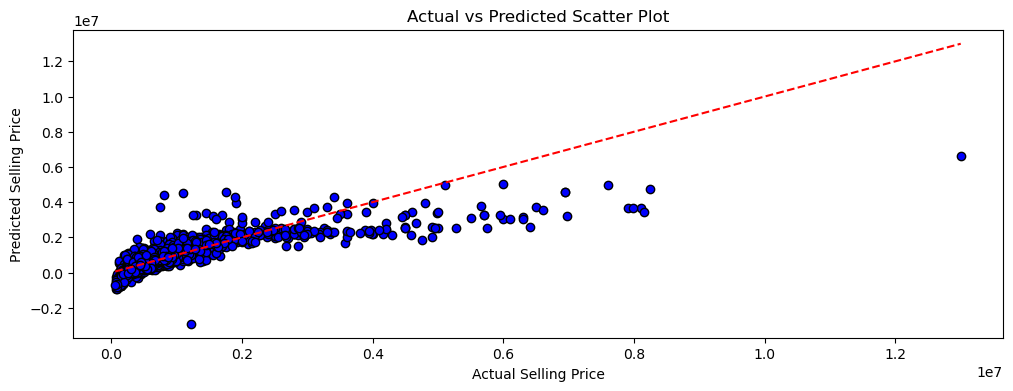

In [71]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(12, 4))

# Scatter plot of actual vs predicted values
plt.scatter(test_Y, predictions, color='blue', edgecolor='black')

# Plot the ideal line (perfect predictions)
plt.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], color='red', linestyle='--')

# Set plot titles and labels
plt.title('Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

# Show the plot
plt.show()


## The red dashed line represents the ideal line (where predicted values exactly match actual values). The scatter points show how close your predictions are to the actual prices. The closer the points are to the red line, the better the model.


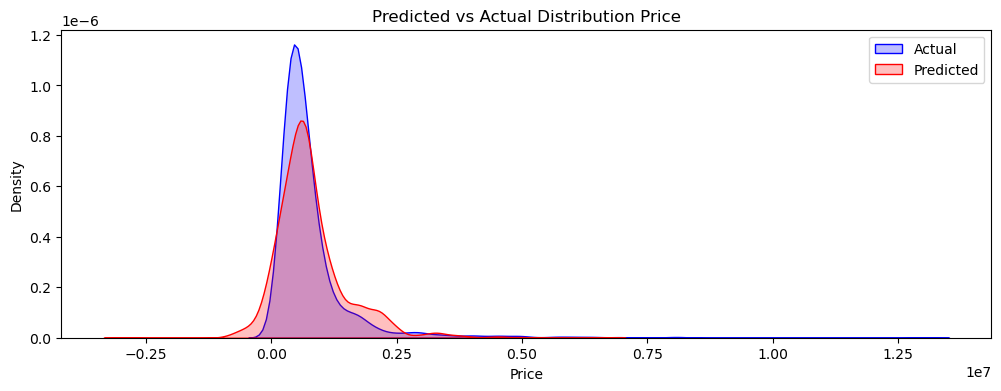

In [74]:
# Plotting Actual vs Predicted Distribution Price
plt.figure(figsize=(12, 4))

# Kernel Density Estimation (KDE) plot for actual prices
sns.kdeplot(test_Y, color='blue', label='Actual', fill=True)

# KDE plot for predicted prices
sns.kdeplot(predictions, color='red', label='Predicted', fill=True)

# Set plot titles and labels
plt.title('Predicted vs Actual Distribution Price')
plt.xlabel('Price')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show the plot
plt.show()


### **Interpreting the Predicted vs Actual Distribution**
- In a **good model**, the **predicted price distribution** should **closely match** the **actual price distribution**.
- Any **significant difference** suggests that the model **isn't capturing the distribution of prices well**.
- If the predicted distribution is **shifted** or has **different variance**, it indicates **bias or underfitting** in the model.
- **Goal:** Minimize discrepancies between actual and predicted distributions for better model performance.
